In [8]:
import torch
import torchvision.datasets as dataset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random
import torch.optim as optim
import torch.nn.functional as F

In [9]:
mnist_train = dataset.FashionMNIST(root="data/FashionMNIST_data", # 데이터 저장 위치
                            train=True, # train data로 지정
                            transform=transforms.ToTensor(), # array -> torchTensor로 변환
                            download=True)

mnist_test = dataset.FashionMNIST(root="data/FashionMNIST_data", # 데이터 저장 위치
                            train=False, # test data로 지정
                            transform=transforms.ToTensor(), # array -> torchTensor로 변환
                            download=True)

In [11]:
epochs = 15
batch_size = 100 

In [21]:
data_loader = DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)
data_loader.dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data/FashionMNIST_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [14]:
for X, Y in data_loader:
    print(X.size(), Y.size(), Y[0])
    break

torch.Size([100, 1, 28, 28]) torch.Size([100]) tensor(0)


In [5]:
random.seed(777) # torch.manul_seed(777) 랑 동일
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else 'cpu')
if device == 'cuda':
    torch.cuda.manual_seed(777)

In [6]:
print(mnist_train)
print(mnist_test)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data/FashionMNIST_data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data/FashionMNIST_data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [ ]:
print(mnist_train[0])

In [43]:
import numpy as np
def plot(x, y):
    plt.figure(figsize=(8, 10))
    for i in range(len(x)):
        plt.subplot(5,10,i+1)
        plt.title(y[i].item())
        img = np.array(x[i]).reshape(28, 28)
        plt.imshow(img, cmap="gray")
        plt.axis("off")
    plt.show()
        

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8,
        4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5, 2, 1, 6, 6, 7, 9, 5, 9, 2, 7, 3,
        0, 3])


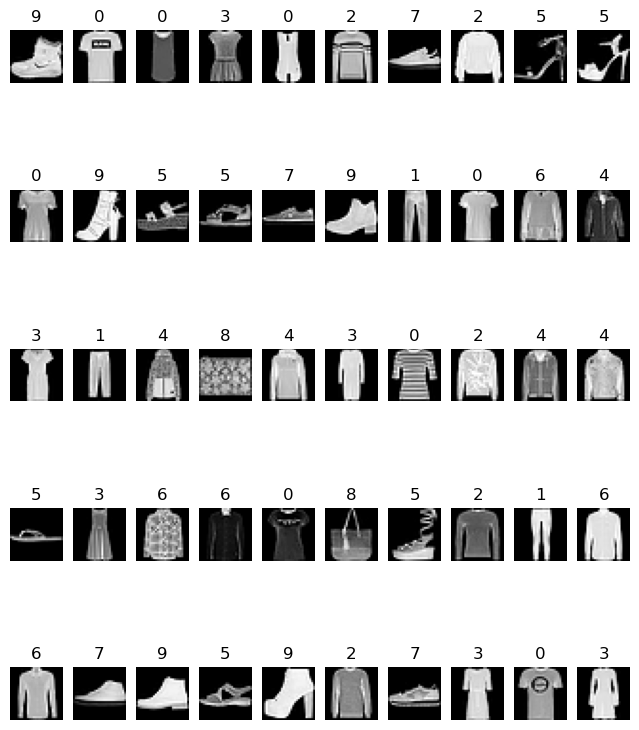

In [44]:
print(mnist_train.train_labels[:50])
plot(mnist_train.data[:50], mnist_train.train_labels[:50])

In [45]:
model = nn.Sequential(
    nn.Linear(784, 500, bias=True),
    nn.LeakyReLU(),
    nn.Linear(500, 400, bias=True),
    nn.LeakyReLU(),
    nn.Linear(400, 300, bias=True),
    nn.LeakyReLU(),
    nn.Linear(300, 200, bias=True),
    nn.LeakyReLU(),
    nn.Linear(200, 100, bias=True),
    nn.LeakyReLU(),
    nn.Linear(100, 10, bias=True)
)
model

Sequential(
  (0): Linear(in_features=784, out_features=500, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=500, out_features=400, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=400, out_features=300, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=300, out_features=200, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=200, out_features=100, bias=True)
  (9): LeakyReLU(negative_slope=0.01)
  (10): Linear(in_features=100, out_features=10, bias=True)
)

In [46]:
crit = nn.CrossEntropyLoss()
optimzer = optim.Adam(model.parameters())

In [47]:
for epoch in range(epochs):
    avg_cost = 0
    for X, Y in data_loader:
        X = X.view(-1, 28*28)
        y_hat = model(X)
        cost = crit(y_hat, Y)

        optimzer.zero_grad()
        cost.backward()
        optimzer.step()

        avg_cost += cost.item()
    
    avg_cost = avg_cost / 100
    print("Epoch : {} Cost : {}".format(epoch, avg_cost))

Epoch : 0 Cost : 3.5389022397994996
Epoch : 1 Cost : 2.3382057650387287
Epoch : 2 Cost : 2.064180569797754
Epoch : 3 Cost : 1.9285616618394852
Epoch : 4 Cost : 1.788996726796031
Epoch : 5 Cost : 1.7074266357719898
Epoch : 6 Cost : 1.6245423464477062
Epoch : 7 Cost : 1.5611798083782196
Epoch : 8 Cost : 1.4789470492303372
Epoch : 9 Cost : 1.4294108875840903
Epoch : 10 Cost : 1.361443486660719
Epoch : 11 Cost : 1.361160843744874
Epoch : 12 Cost : 1.2891886198520661
Epoch : 13 Cost : 1.2168967907130719
Epoch : 14 Cost : 1.1981546039134263


In [48]:
with torch.no_grad():
    x_test = mnist_test.test_data.view(-1, 28*28).float()
    y_test = mnist_test.test_labels
    pred = model(x_test).argmax(dim=1)
    accuracy = (pred == y_test).sum() / len(pred)
    print(accuracy)
    print(pred[:5])
    print(y_test[:5])

c:\Users\yang\anaconda3\Lib\site-packages\torchvision\datasets\mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
c:\Users\yang\anaconda3\Lib\site-packages\torchvision\datasets\mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


tensor(0.8599)
tensor([9, 2, 1, 1, 6])
tensor([9, 2, 1, 1, 6])


In [38]:
import pandas as pd
from sklearn.metrics import confusion_matrix

In [49]:
pd.DataFrame(confusion_matrix(y_test, pred),
            index=['true_%d'%i for i in range(10)],
            columns=['pred_%d'%i for i in range(10)] )

,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9
true_0,889,25,5,15,9,0,50,0,7,0
true_1,0,987,1,5,5,0,1,0,1,0
true_2,21,4,666,7,262,0,37,1,1,1
true_3,16,57,10,784,119,0,6,0,8,0
true_4,0,1,32,4,946,0,14,0,3,0
true_5,0,0,0,0,0,908,0,30,2,60
true_6,165,10,55,19,218,0,516,0,17,0
true_7,0,0,0,0,0,2,0,948,0,50
true_8,5,0,0,0,13,0,1,3,978,0
true_9,0,0,0,0,0,4,1,18,0,977


In [51]:
y_test.unique()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])